# TCS_ANN_MLP_Model

##  step1: Importing_Data

In [ ]:
# data taking

import pandas as pd

df = pd.read_csv('/content/cleanData_TCS_25Aug2004_5sep2024_NSE.csv')

## step0: Prob_statement_Define

Q. Problem statement: Forcast Close price (Dependent variable) considering all factor (Open, low, close, Adj close, volume) as independent variables

Sol: we try to

In [2]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-25,"1,198.70","1,198.70",979,987.95,"1,71,16,372"
1,2004-08-26,992,997,975.3,979,"50,55,400"
2,2004-08-27,982.4,982.4,958.55,962.65,"38,30,750"
3,2004-08-30,969.9,990,965,986.75,"30,58,151"
4,2004-08-31,986.5,990,976,988.1,"26,49,332"


In [ ]:
# show statics

# df.describe()

## step2: Analysis_Data

In [3]:
# analysis parts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4967 non-null   object
 1   Open    4967 non-null   object
 2   High    4967 non-null   object
 3   Low     4967 non-null   object
 4   Close   4967 non-null   object
 5   Volume  4967 non-null   object
dtypes: object(6)
memory usage: 233.0+ KB


In [4]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop any rows where 'Date' conversion failed
df.dropna(subset=['Date'], inplace=True)

# Sort the data by date
df.sort_values(by='Date', inplace=True)

# Summary statistics
summary_stats = df.describe()

# Time range
time_range = df['Date'].min(), df['Date'].max()

summary_stats, time_range


(                                Date
 count                           4967
 mean   2014-08-25 11:25:21.320716800
 min              2004-08-25 00:00:00
 25%              2009-08-22 12:00:00
 50%              2014-08-14 00:00:00
 75%              2019-09-04 12:00:00
 max              2024-09-05 00:00:00,
 (Timestamp('2004-08-25 00:00:00'), Timestamp('2024-09-05 00:00:00')))

In [5]:
#duration
time_range

(Timestamp('2004-08-25 00:00:00'), Timestamp('2024-09-05 00:00:00'))

### s(i) Statistical_Analy

In [6]:
# Summary statistics
summary_stats = df.describe()

summary_stats

,Date
count,4967
mean,2014-08-25 11:25:21.320716800
min,2004-08-25 00:00:00
25%,2009-08-22 12:00:00
50%,2014-08-14 00:00:00
75%,2019-09-04 12:00:00
max,2024-09-05 00:00:00


In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-25,"1,198.70","1,198.70",979,987.95,"1,71,16,372"
1,2004-08-26,992,997,975.3,979,"50,55,400"
2,2004-08-27,982.4,982.4,958.55,962.65,"38,30,750"
3,2004-08-30,969.9,990,965,986.75,"30,58,151"
4,2004-08-31,986.5,990,976,988.1,"26,49,332"


## step3: PrePreocessing_Data

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-25,"1,198.70","1,198.70",979,987.95,"1,71,16,372"
1,2004-08-26,992,997,975.3,979,"50,55,400"
2,2004-08-27,982.4,982.4,958.55,962.65,"38,30,750"
3,2004-08-30,969.9,990,965,986.75,"30,58,151"
4,2004-08-31,986.5,990,976,988.1,"26,49,332"


In [9]:
# Sort by date
df.sort_values('Date', inplace=True)

In [10]:
# Select the 'Close' column
Close_prices = df['Close'].values

## step4: Splitting_dataPoint

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
# import metric imp library for MAE, MSE, RMSE, R Sq

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
# Scale the data
scaler = MinMaxScaler()

# Select the 'Close' column and convert it to numeric, removing commas
Close_prices = pd.to_numeric(df['Close'].str.replace(',', ''), errors='coerce').values

# Reshape the data to a 2D array
Close_prices_scaled = scaler.fit_transform(Close_prices.reshape(-1, 1))


### s(i) prep_dataset_for_MLP

In NumPy, the flatten() function is used to return a copy of the array collapsed into one dimension. It creates a new 1-dimensional array by iterating through all elements of the original array, essentially flattening it.

In [13]:
# Prepare the dataset for MLP
# Use the past 10 days' high prices to predict the next day's high price
X = []
y = []
look_back = 10

for i in range(len(Close_prices_scaled) - look_back):
    X.append(Close_prices_scaled[i:i + look_back])
    y.append(Close_prices_scaled[i + look_back])

X = np.array(X)
y = np.array(y).flatten()

### s(ii) TrainTest_split

In [14]:
# Split the data into training and test sets

train_size = int(len(X) * 0.8)      # 80% taining, 20% testing


X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [15]:
# Reshape X to be 2D for MLPRegressor
X = X.reshape(X.shape[0], -1)  # Reshape to (samples, time_steps * features)

In [ ]:
# Define and train the MLP model

# mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

# # no of hidden layer = 100

# mlp.fit(X_train, y_train)

In [17]:
# Prepare the dataset for MLP
# Use the past 10 days' Close prices to predict the next day's high price
X = []
y = []
look_back = 10

for i in range(len(Close_prices_scaled) - look_back):
    X.append(Close_prices_scaled[i:i + look_back])
    y.append(Close_prices_scaled[i + look_back])

X = np.array(X)
y = np.array(y).flatten()

# Reshape X to be 2D for MLPRegressor
X = X.reshape(X.shape[0], -1)  # Reshape to (samples, time_steps * features)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)      # 80% taining, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define and train the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

MLPRegressor(random_state=42)

## Step5: Predication

In [18]:
# Make predictions
train_predictions = mlp.predict(X_train)
test_predictions = mlp.predict(X_test)


In [19]:
# Inverse transform the predictions and actual values

train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

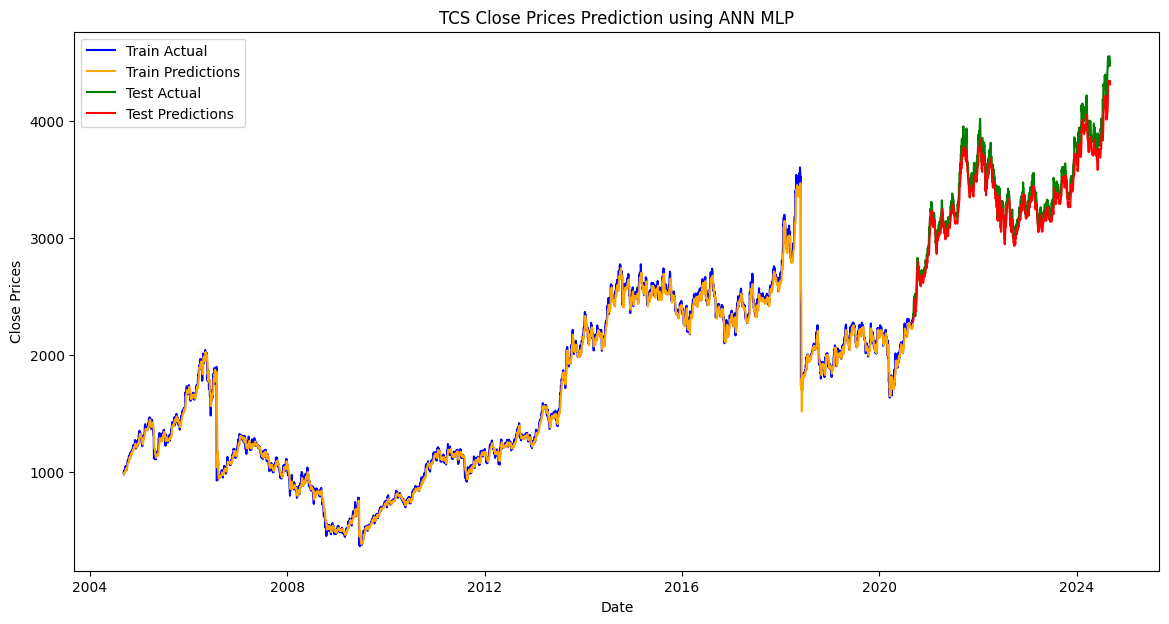

In [20]:
# Plot the actual vs. predicted Close prices


plt.figure(figsize=(14, 7))

plt.plot(df['Date'][look_back:train_size + look_back], y_train_actual, label='Train Actual', color='blue')
plt.plot(df['Date'][look_back:train_size + look_back], train_predictions, label='Train Predictions', color='orange')
plt.plot(df['Date'][train_size + look_back:], y_test_actual, label='Test Actual', color='green')
plt.plot(df['Date'][train_size + look_back:], test_predictions, label='Test Predictions', color='red')


plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.title('TCS Close Prices Prediction using ANN MLP')
plt.legend()
plt.show()



### s(i) plot_predication

In [21]:
# Forecast the next 10 days
last_10_days = Close_prices_scaled[-look_back:]
forecast = []

for _ in range(10):
    next_day = mlp.predict(last_10_days.reshape(1, -1))
    forecast.append(next_day)
    last_10_days = np.append(last_10_days[1:], next_day)


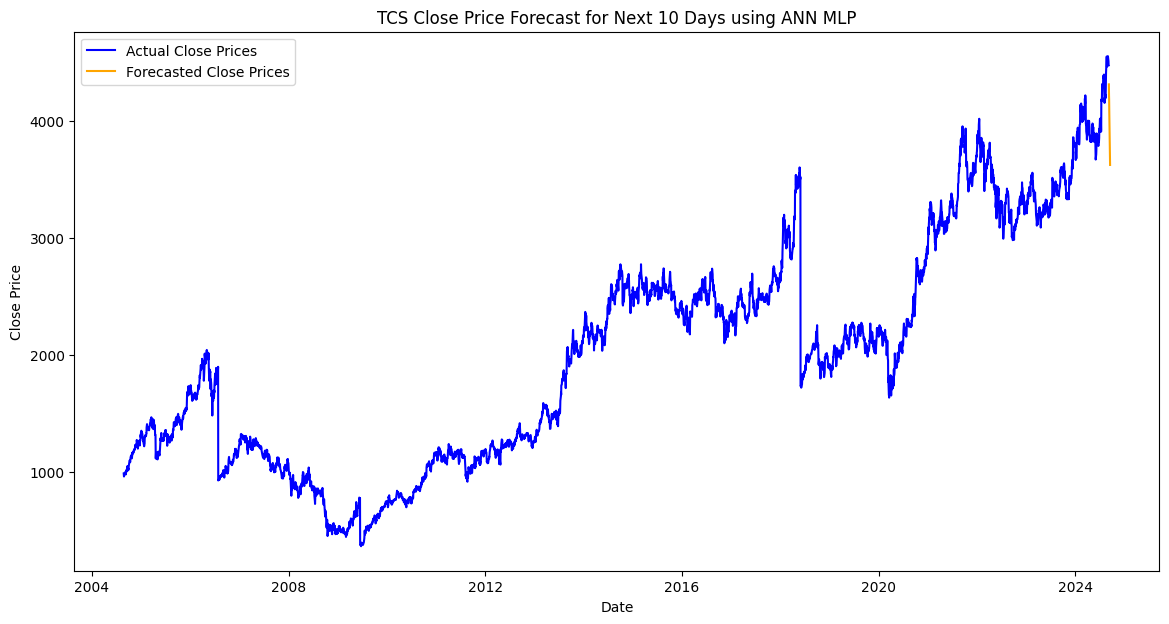

In [22]:
# Inverse transform the forecast
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], Close_prices, label='Actual Close Prices', color='blue')
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10)
plt.plot(future_dates, forecast, label='Forecasted Close Prices', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Close Price Forecast for Next 10 Days using ANN MLP')
plt.legend()
plt.show()



### s(ii) Predicated_Numerical_Val

In [23]:
# Print the forecasted values
for date, value in zip(future_dates, forecast):
    print(f"{date.date()}: {value[0]:.2f}")

2024-09-06: 4313.25
2024-09-07: 4224.13
2024-09-08: 4178.82
2024-09-09: 4083.69
2024-09-10: 4006.27
2024-09-11: 3932.22
2024-09-12: 3848.63
2024-09-13: 3776.69
2024-09-14: 3697.23
2024-09-15: 3624.69


### s(iii) Matrics: MAE

In [24]:
# import metric imp library for MAE, MSE, RMSE, R Sq

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Calculate evaluation metrics

mae_train = mean_absolute_error(y_train_actual, train_predictions)
mse_train = mean_squared_error(y_train_actual, train_predictions)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_actual, train_predictions)

mae_test = mean_absolute_error(y_test_actual, test_predictions)
mse_test = mean_squared_error(y_test_actual, test_predictions)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_actual, test_predictions)

### s(iv) MSE_RMSE_RSq

In [26]:
# Print the evaluation metrics

print("Training Metrics:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.2f}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.2f}")

Training Metrics:
MAE: 31.08
MSE: 3071.05
RMSE: 55.42
R²: 0.99

Testing Metrics:
MAE: 90.83
MSE: 11485.50
RMSE: 107.17
R²: 0.93
